# Probability Calibration

When performing classification you often want not only to predict the class label, but also obtain a probability of the respective label. This probability gives you some kind of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some even do not support probability prediction. The calibration module allows you to better calibrate the probabilities of a given model, or to add support for probability prediction. More details about claibration can be found at the scikit learn website https://scikit-learn.org/stable/modules/calibration.html

In [46]:
%matplotlib inline
from probatus.calibration import Calibrator
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
import pandas as pd

import warnings
warnings.simplefilter(action='ignore')

In [47]:
# Creating a dummy dataset
np.random.seed(42)
X, y = make_classification(n_samples=10000, n_features=10, n_informative=2, n_redundant=0, weights=[0.75,0.25])
X = pd.DataFrame(X)
y = pd.DataFrame(y)

n_train_samples = 9000

X_train, y_train = X[:n_train_samples], y[:n_train_samples]
X_test, y_test = X[n_train_samples:], y[n_train_samples:]

In [48]:
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9
0,-1.210553,0.489124,-0.170607,0.678116,0.317374,0.223679,-2.648368,1.252575,0.788824,-0.043899
1,0.276602,-0.590667,0.662015,0.049810,-0.360608,-1.122170,-1.935954,0.094508,-0.743336,-1.466553
2,-0.432222,-0.422658,0.957586,-0.779766,0.509617,0.072764,-1.802808,1.509765,0.345242,1.656180


In [49]:
y_train.head(3)

,0
0,0
1,0
2,0


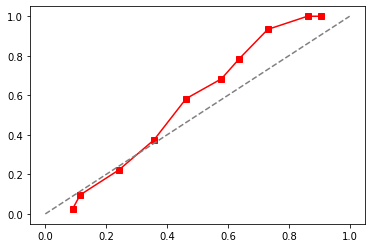

In [50]:
# Fitting a radom forest on the data and producing a callibration plot
clf_rf = RandomForestClassifier(max_depth=4)
clf_rf.fit(X_train, y_train)
y_test_predict_proba = clf_rf.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Uncalibrated')
plt.plot([0, 1], [0, 1], '--', color='gray')

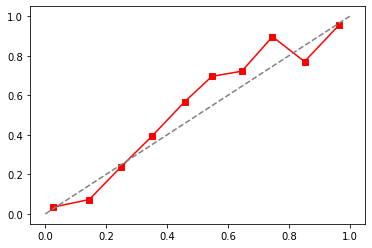

In [51]:
# Fitting a radom forest on the data and producing a callibration plot
clf_lg = LogisticRegression()
clf_lg.fit(X_train, y_train)
y_test_predict_proba = clf_lg.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Uncalibrated')
plt.plot([0, 1], [0, 1], '--', color='gray')

Callibrate Random Forest

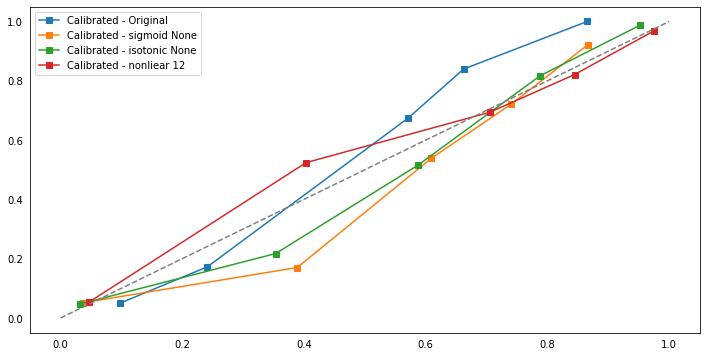

In [52]:
# Lets run the calibration for random forest
my_calibrator_rf = Calibrator({'sigmoid':None,'isotonic':None,'nonliear':12}, 3, 'agglomerative', 5)

# Fitting the calibrator on the data and the model
my_calibrator_rf.fit(clf_rf,X_train,X_test,y_test,y_train)

# Plotting the calibrated RF
my_calibrator_rf.plot()

In [53]:
# Extracting the calibrated probabilities
my_calibrator_rf.score('isotonic',X_test,clf_rf)

array([[0.2182476 , 0.7817524 ],
       [0.96206001, 0.03793999],
       [0.59461809, 0.40538191],
       ...,
       [0.96049154, 0.03950846],
       [0.98736046, 0.01263954],
       [0.97748106, 0.02251894]])

In [54]:
# Extracting the dictionary with all calibrators
my_calibrator_rf.get_calibs()

{'sigmoid': CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                              class_weight=None,
                                                              criterion='gini',
                                                              max_depth=4,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                                              n_estimators=1

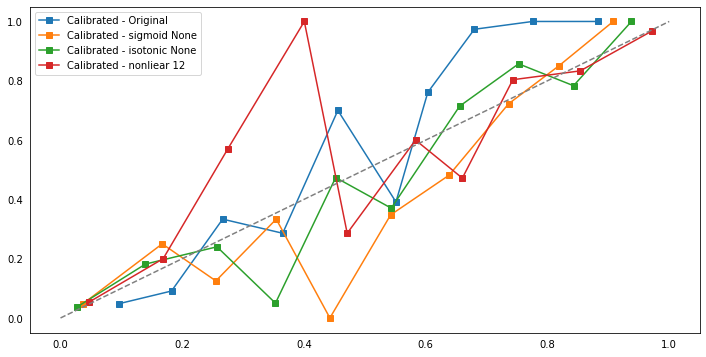

In [55]:
# Lets run the calibration for random forest
my_calibrator_rf = Calibrator({'sigmoid':None,'isotonic':None,'nonliear':12}, 3, 'simple', 10)

# Fitting the calibrator on the data and the model
my_calibrator_rf.fit(clf_rf,X_train,X_test,y_test,y_train)

# Plotting the calibrated RF
my_calibrator_rf.plot()

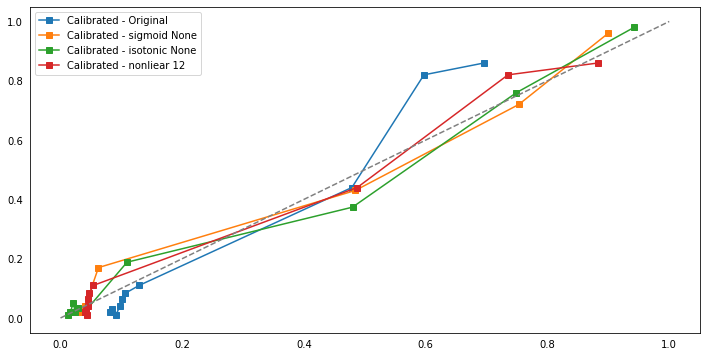

In [56]:
# Lets run the calibration for random forest
my_calibrator_rf = Calibrator({'sigmoid':None,'isotonic':None,'nonliear':12}, 3, 'quantile', 10)

# Fitting the calibrator on the data and the model
my_calibrator_rf.fit(clf_rf,X_train,X_test,y_test,y_train)

# Plotting the calibrated RF
my_calibrator_rf.plot()